In [5]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10] 

In [2]:
raw_expre = pd.read_csv('datasets/GSE121239/GSE121239/raw_expre.csv', sep=",")  
raw_expre 

,Unnamed: 0,GSM3428310,GSM3428311,GSM3428312,GSM3428313,GSM3428314,GSM3428315,GSM3428316,GSM3428317,GSM3428318,...,GSM3428612,GSM3428613,GSM3428614,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621
0,1007_PM_s_at,4.955257,4.870351,4.889382,4.956931,4.518659,4.039076,4.363994,4.474612,4.109501,...,4.143518,4.163726,3.552997,4.688624,4.101748,3.987773,4.674258,4.855265,5.227129,5.702039
1,1053_PM_at,5.984784,6.119432,5.914195,5.887814,5.962590,6.213503,6.523682,6.630676,6.424815,...,5.601486,5.307239,5.585876,6.538760,6.420332,5.949633,5.587069,6.032248,6.317659,6.449117
2,117_PM_at,9.477945,9.828793,9.719707,9.148228,9.378308,9.688581,8.985668,10.329326,8.890190,...,9.077410,9.349135,9.554533,9.941707,10.278584,9.672171,8.650779,9.264324,9.430051,9.660996
3,121_PM_at,4.553229,4.487615,4.645168,4.681996,4.990632,4.762670,4.528352,4.693206,3.875943,...,5.177162,4.961182,5.267552,4.404966,4.013917,4.234865,4.418242,4.269110,4.115500,4.135403
4,1255_PM_g_at,1.921190,2.169639,2.410481,1.885852,1.987256,2.029976,2.110129,2.136902,2.169476,...,2.224418,2.158327,2.316911,1.942149,1.929420,1.862300,1.842566,2.258901,1.951895,1.896087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54710,AFFX-ThrX-5_at,2.365662,2.344025,2.537787,2.140112,2.381164,8.440270,8.646316,8.013230,8.402119,...,2.192767,2.476008,2.580959,2.440795,2.469701,2.252614,3.157310,2.106090,2.005743,2.026090
54711,AFFX-ThrX-M_at,2.277690,2.480338,2.475397,2.749770,2.593526,9.183744,9.454726,8.446197,9.143964,...,2.639253,2.443756,2.271883,2.293643,2.424896,2.411526,2.435952,2.237814,2.377712,2.230381
54712,AFFX-TrpnX-3_at,1.897895,1.632143,1.534480,1.484037,1.949685,1.589518,1.552478,1.641031,1.505580,...,1.738948,1.855197,1.884866,1.881311,1.598604,1.661921,1.836948,1.777169,1.550851,1.626575
54713,AFFX-TrpnX-5_at,2.335483,2.280212,2.479271,2.404451,2.560628,2.382748,2.314126,2.433191,2.334751,...,2.822136,2.517637,2.529161,2.802461,2.411997,2.470162,2.490672,2.299285,2.253745,2.420385


In [3]:
"""
Mapping IDs for ELF1 / IRF1 / SYNGR1  
"""

id_refs = {'GSE121239_family.soft.gz': 
           {'ELF1': ['212418_PM_at', '212420_PM_at'],
            'IRF1': ['202531_PM_at', '238725_PM_at'], 
            'SYNGR1': ['204287_PM_at', '213854_PM_at', '210613_PM_s_at'] 
           }
          } 
elf1 = id_refs['GSE121239_family.soft.gz']['ELF1'][0] 
irf1 = id_refs['GSE121239_family.soft.gz']['IRF1'][0] 
syngr1 = id_refs['GSE121239_family.soft.gz']['SYNGR1'][0] 

## Gene Plots (for ELF1 / IRF1 / SYNGR1)

<AxesSubplot:xlabel='new_col', ylabel='21723'>

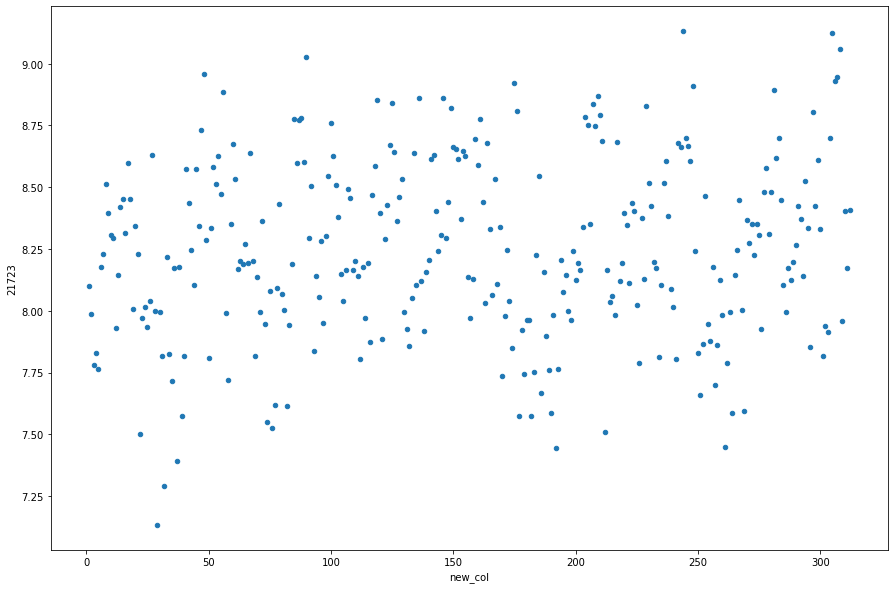

In [6]:
"""
ELF1 
""" 

df = raw_expre[raw_expre['Unnamed: 0']==elf1].T.drop(['Unnamed: 0']) 
df['new_col'] = range(1, len(df) + 1)
df.plot.scatter(x='new_col', y=21723) 

<AxesSubplot:xlabel='new_col', ylabel='11979'>

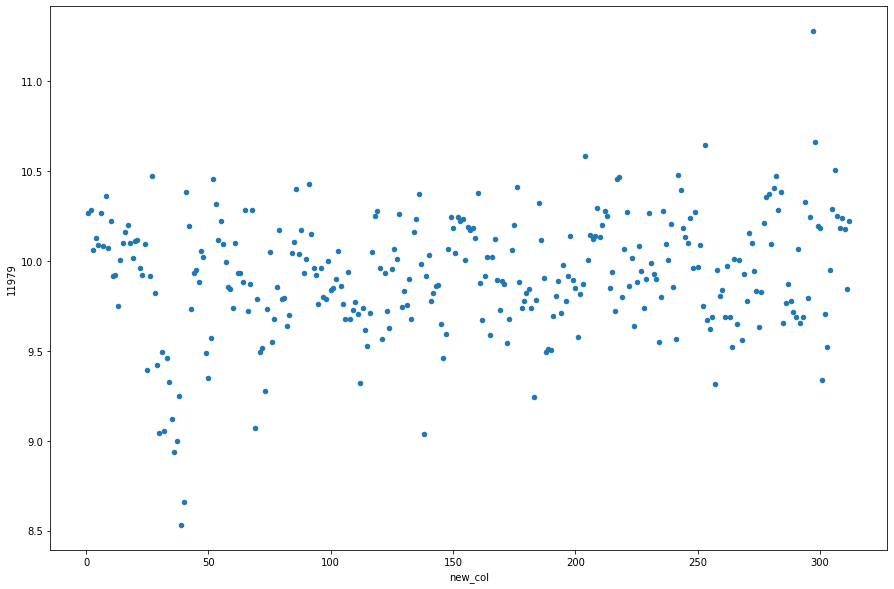

In [7]:
"""
IRF1 
""" 

df = raw_expre[raw_expre['Unnamed: 0']==irf1].T.drop(['Unnamed: 0']) 
df['new_col'] = range(1, len(df) + 1)
df.plot.scatter(x='new_col', y=11979) 

<AxesSubplot:xlabel='new_col', ylabel='13734'>

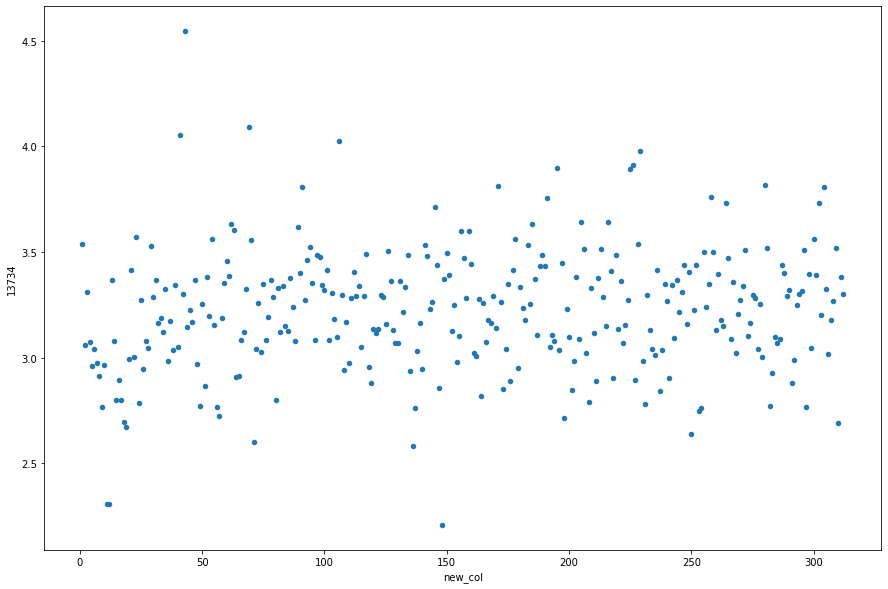

In [8]:
"""
SYNGR1 
""" 

df = raw_expre[raw_expre['Unnamed: 0']==syngr1].T.drop(['Unnamed: 0']) 
df['new_col'] = range(1, len(df) + 1)
df.plot.scatter(x='new_col', y=13734) 

<AxesSubplot:>

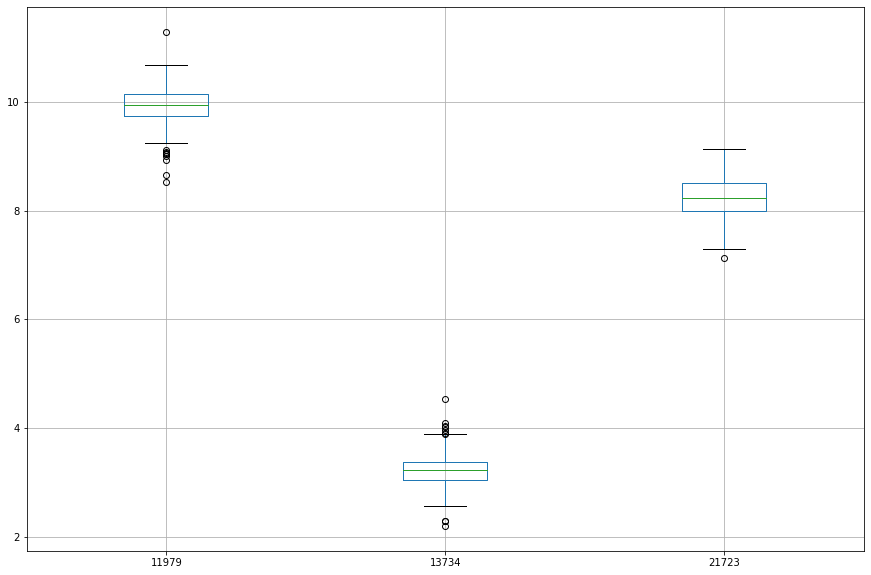

In [9]:
""" 
Box plot 
"""

df = raw_expre[(raw_expre['Unnamed: 0']==syngr1) | (raw_expre['Unnamed: 0']==elf1) | (raw_expre['Unnamed: 0']==irf1)] 
df = df.T.drop(['Unnamed: 0']) 
df=df.astype(float) 
df.boxplot(column=[11979, 13734, 21723]) 

## Distribution of Data 

#### Means of genes vs number of genes with that mean. Or a histogram of means of genes for all samples. 

<AxesSubplot:>

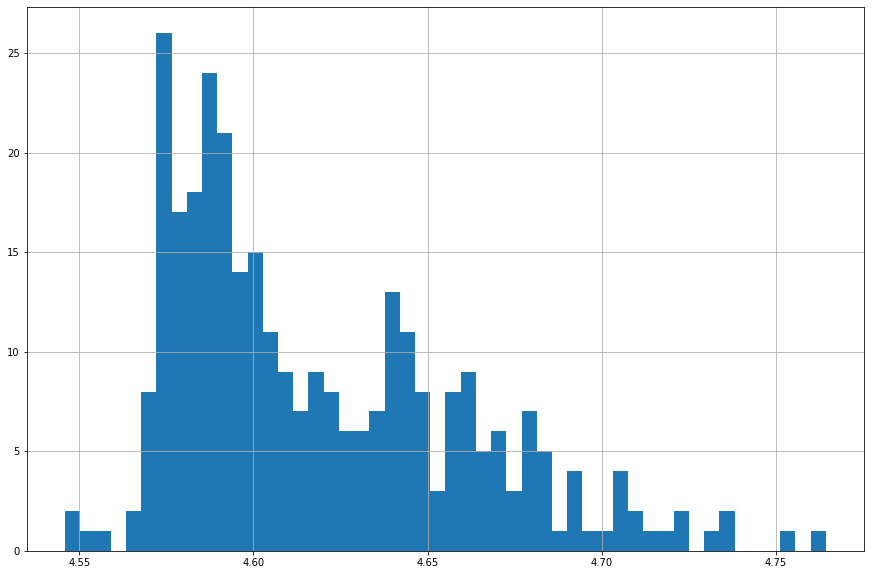

In [10]:
raw_expre.T.drop(['Unnamed: 0']).T.mean().hist(bins=50) 

## Coefficient of variation Plot 

In [11]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) 
raw_expre['CV'] = raw_expre.apply(lambda row : cv(row.T.drop(['Unnamed: 0'])), axis = 1) 

<AxesSubplot:>

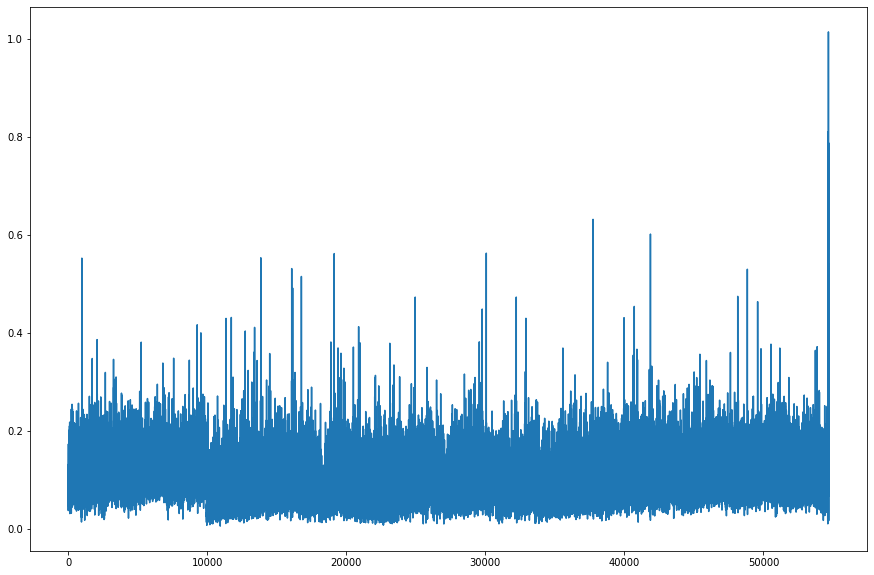

In [12]:
raw_expre['CV'].plot()

#### Min coefficient of variation 

In [13]:
raw_expre['CV'].min()

0.006700409311555023

#### Max coefficient of variation 

In [14]:
raw_expre['CV'].max()

1.0136865186910569

#### Coefficient of variation less than 1 

In [15]:
raw_expre[raw_expre['CV']<0.05] 

,Unnamed: 0,GSM3428310,GSM3428311,GSM3428312,GSM3428313,GSM3428314,GSM3428315,GSM3428316,GSM3428317,GSM3428318,...,GSM3428613,GSM3428614,GSM3428615,GSM3428616,GSM3428617,GSM3428618,GSM3428619,GSM3428620,GSM3428621,CV
5,1294_PM_at,8.164253,7.886918,7.890372,8.006514,8.223370,7.615219,7.518055,7.593616,7.756518,...,7.722717,7.902521,7.554671,8.580205,7.906560,7.470552,7.490315,8.448537,8.114021,0.048666
11,1487_PM_at,6.513786,6.376531,6.335507,6.017157,6.445223,6.550342,6.334670,6.703720,6.584556,...,6.640387,6.187064,6.067207,6.313449,6.351740,6.339993,6.020172,6.326821,6.128183,0.038333
125,1552426_PM_a_at,9.273507,9.346920,9.345921,9.276374,9.220451,8.957553,9.122299,9.178099,8.857551,...,9.513392,9.378041,9.392441,9.044383,9.338739,9.562527,9.383626,8.943554,9.199235,0.032146
230,1552584_PM_at,9.450264,9.631534,9.527671,9.679938,9.542558,9.771282,9.754457,9.958564,9.634735,...,9.701337,9.108327,9.926022,9.823461,9.986750,10.175068,10.193342,10.462910,10.381160,0.032974
250,1552613_PM_s_at,7.828109,7.780918,7.799043,7.876414,7.614225,8.682949,8.592141,8.797315,8.719742,...,7.303400,7.090454,8.265162,7.748609,8.027825,8.074449,8.156261,8.191898,8.596294,0.046153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54687,AFFX-r2-Ec-bioC-5_at,10.534891,10.615954,10.520124,10.122136,10.784272,9.973542,9.581456,9.490723,9.668271,...,10.208796,10.582990,10.819449,10.000433,9.990244,9.790873,10.775514,9.955033,10.061096,0.036321
54688,AFFX-r2-Ec-bioD-3_at,11.797240,11.758842,11.654328,11.465373,11.944136,11.396449,11.309968,11.262880,11.248955,...,11.634656,12.144116,12.258171,11.899173,11.909470,11.528059,12.704621,11.732537,11.809097,0.027470
54689,AFFX-r2-Ec-bioD-5_at,11.877063,11.941846,11.692179,11.540996,12.059905,11.543620,11.521529,11.449839,11.335706,...,11.576494,11.986796,12.478607,11.981583,11.988134,11.566799,12.417920,11.968478,11.979043,0.023517
54690,AFFX-r2-P1-cre-3_at,13.175805,13.200250,13.062476,13.065238,13.240244,13.043459,13.025171,12.939117,12.897555,...,13.500318,13.508400,13.778893,13.359825,13.448374,13.369460,13.678963,13.108090,13.177597,0.017775


#### Coefficient of variation of ELF1 / IRF1 / SYNGR1 

In [16]:
raw_expre[raw_expre['Unnamed: 0']==elf1]['CV'] 

21723    0.044065
Name: CV, dtype: float64

In [17]:
raw_expre[raw_expre['Unnamed: 0']==irf1]['CV']

11979    0.033174
Name: CV, dtype: float64

In [18]:
raw_expre[raw_expre['Unnamed: 0']==syngr1]['CV']

13734    0.091152
Name: CV, dtype: float64